In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

**Load DataSet**

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**Plot Dataset Samples**

<ipython-input-16-f8b083044e61>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[i].title.set_text(class_names[int(y_train[i])])


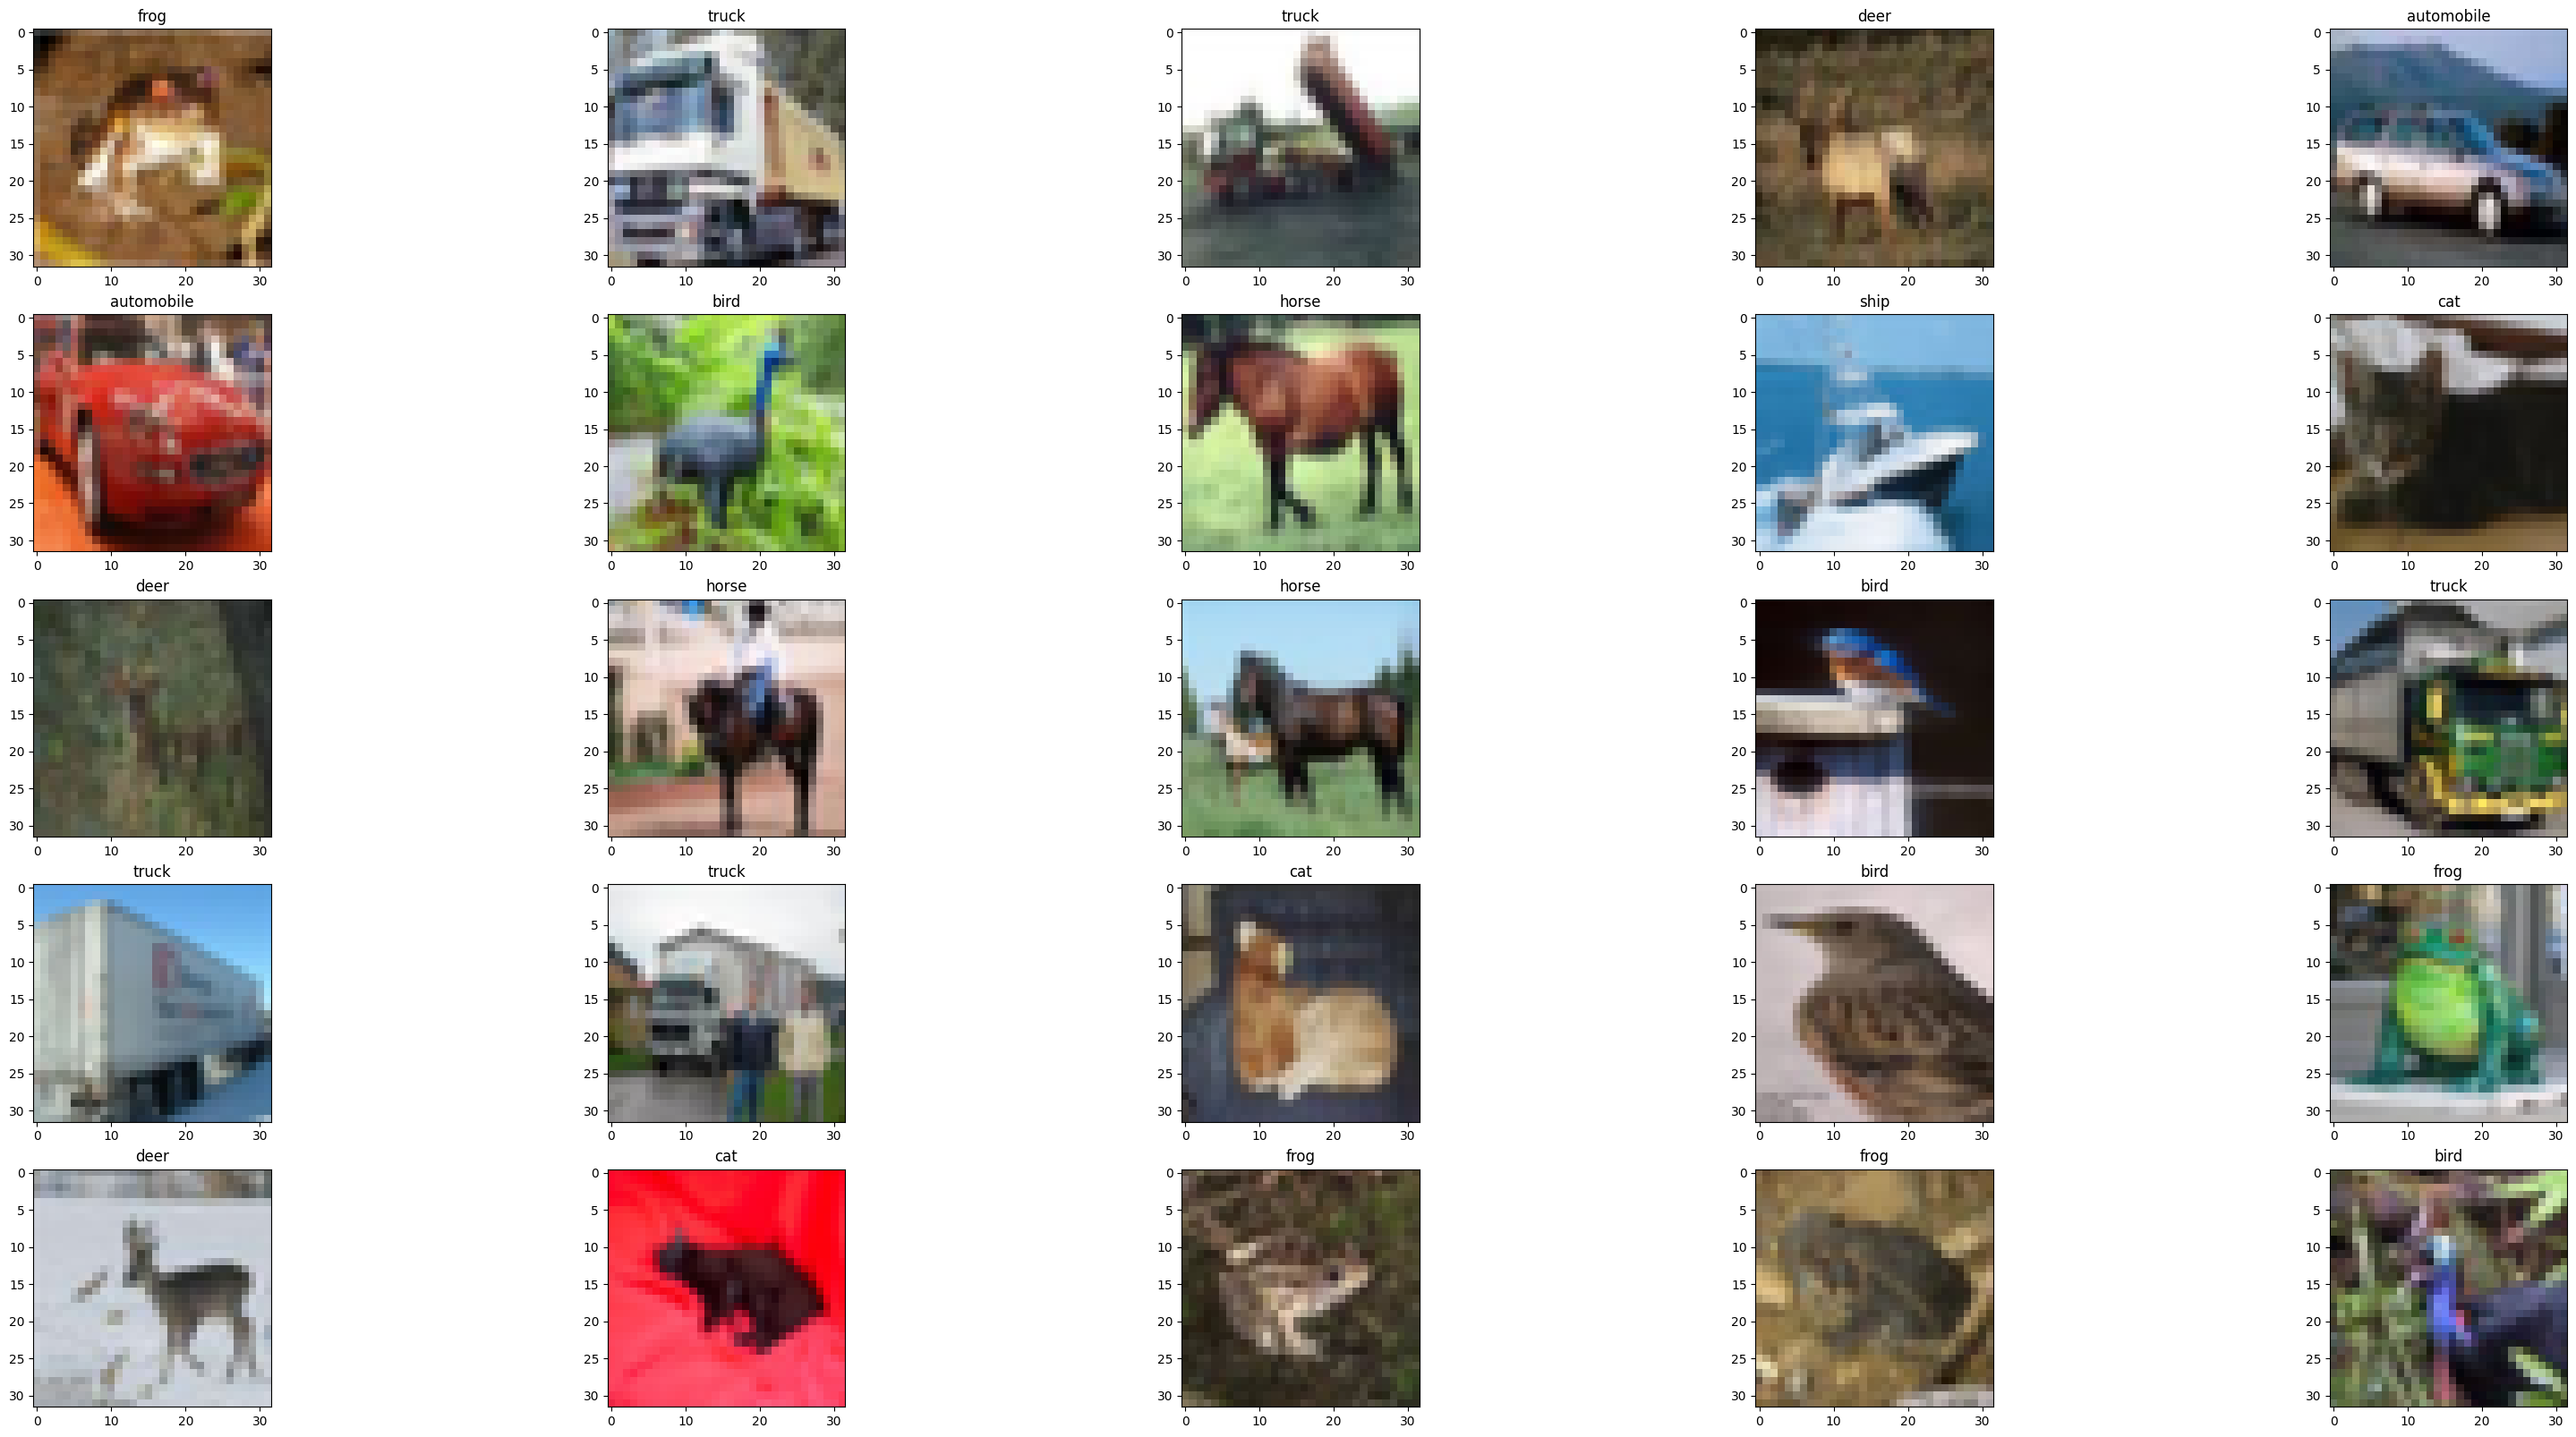

In [16]:
fig, ax = plt.subplots(5, 5, figsize=(40, 20))
ax = ax.flatten()
for i in range(25):
    ax[i].imshow(x_train[i])
    ax[i].title.set_text(class_names[int(y_train[i])])


**Analyse Pictures**

In [17]:
x_train.shape

(50000, 32, 32, 3)

**Normalize Dataset**

In [18]:
x_train = x_train / 255
x_test = x_test / 255

In [20]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.2, random_state=42)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.0001)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 average_pooling2d (Average  (None, 2, 2, 256)         0

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
his = model.fit(x_train, y_train, epochs=80, batch_size=4056, validation_data=(x_val, y_val))

Epoch 1/80
13/13 [==============================] - 18s 488ms/step - loss: 2.7491 - accuracy: 0.1513 - val_loss: 2.4609 - val_accuracy: 0.2130
Epoch 2/80
13/13 [==============================] - 2s 179ms/step - loss: 2.3418 - accuracy: 0.2337 - val_loss: 2.1861 - val_accuracy: 0.2780
Epoch 3/80
13/13 [==============================] - 2s 168ms/step - loss: 2.1170 - accuracy: 0.2840 - val_loss: 2.0033 - val_accuracy: 0.3255
Epoch 4/80
13/13 [==============================] - 2s 169ms/step - loss: 1.9814 - accuracy: 0.3264 - val_loss: 1.8983 - val_accuracy: 0.3630
Epoch 5/80
13/13 [==============================] - 2s 171ms/step - loss: 1.8965 - accuracy: 0.3536 - val_loss: 1.8293 - val_accuracy: 0.3795
Epoch 6/80
13/13 [==============================] - 2s 169ms/step - loss: 1.8302 - accuracy: 0.3750 - val_loss: 1.7609 - val_accuracy: 0.4070
Epoch 7/80
13/13 [==============================] - 2s 183ms/step - loss: 1.7711 - accuracy: 0.3943 - val_loss: 1.6888 - val_accuracy: 0.4310
Epoch

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9087 - accuracy: 0.7220


[0.908740222454071, 0.722000002861023]

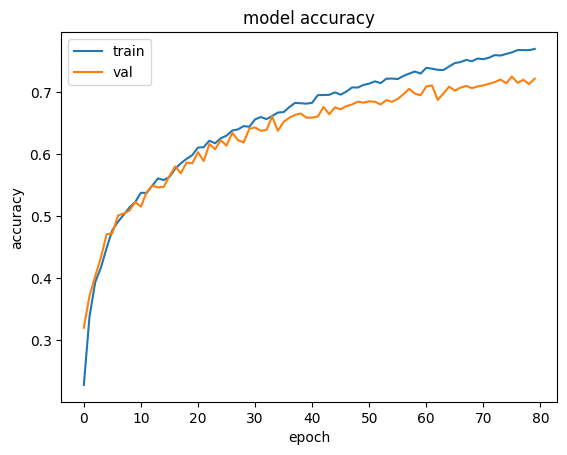

In [ ]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()